In [1]:
import pandas as pd
import numpy as np
import csv
from copy import deepcopy
from pandas import datetime
from copy import deepcopy
import gc
import random
import datetime
import csv
from copy import deepcopy
from os import listdir
from os.path import isfile, join, isdir
from tqdm import tqdm_notebook
# from Downloader import Extractor
# from Preprocessing import Preprocessor, set_onelevel, set_multilevel
# from Filters import XGBFilter
# from Filters import quantile_huber_loss, quantile_huber_obj 
import pickle
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

from sklearn.decomposition import PCA

sns.set()
%matplotlib inline

/home/user/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
final = pd.read_csv("past_and_current?dl=0", tupleize_cols=True, header=[0, 1], skipinitialspace=False, index_col=[0])
final.columns = pd.MultiIndex.from_tuples(final.columns)


AttributeError: 'DataFrame' object has no attribute 'set'

In [11]:
set(final[('station_id', '0.0')])

{113, 114, 115, 116, 117, 119}

In [12]:
final.shape

(337115, 77)

In [14]:
stat_13 = final[final[('station_id', '0.0')] == 113]
stat_13.columns

MultiIndex(levels=[[u'data_dampness', u'data_pressure', u'data_t_air', u'data_t_road', u'data_t_underroad', u'date_time', u'id_dampness', u'id_pressure', u'id_t_air', u'id_t_road', u'id_t_underroad', u'station_id', u'valid_dampness', u'valid_pressure', u'valid_t_air', u'valid_t_road', u'valid_t_underroad'], [u'-0.5', u'-1.0', u'-1.5', u'-2.0', u'-2.5', u'-3.0', u'-3.5', u'-4.0', u'-4.5', u'-5.0', u'-5.5', u'-6.0', u'0.0']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 11, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16], [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]])

In [97]:
road_date = pd.concat([stat_13[ 'date_time'], stat_13['data_t_road']], axis = 1, keys={'date', 'values'})

In [15]:
def params_analysis(pr, title, n_pca = 2):
    plt.close('all')
    print( "Analysis for", title)
    df = stat_13[pr]
    
    print(df.shape)
    scaler = StandardScaler().fit(df)
    X_scaled_pr = scaler.transform(df)
    
    pca_all = PCA()
    pca_all.fit(X_scaled_pr)
    pca = PCA(n_components= n_pca)
    X_pca_pr = pca.fit_transform(X_scaled_pr)
    
    f, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(15,10))
        
    ax1.plot(pca_all.explained_variance_ratio_)
    ax1.set_title("PCA  explained variance ratio " + title) 

    
    ax2.scatter(X_pca_pr[:, 0], X_pca_pr[:, 1])
    ax2.set_title("PCA " + title)
        
    
    plt.show()

('Analysis for', 'Dampness')
(63070, 13)


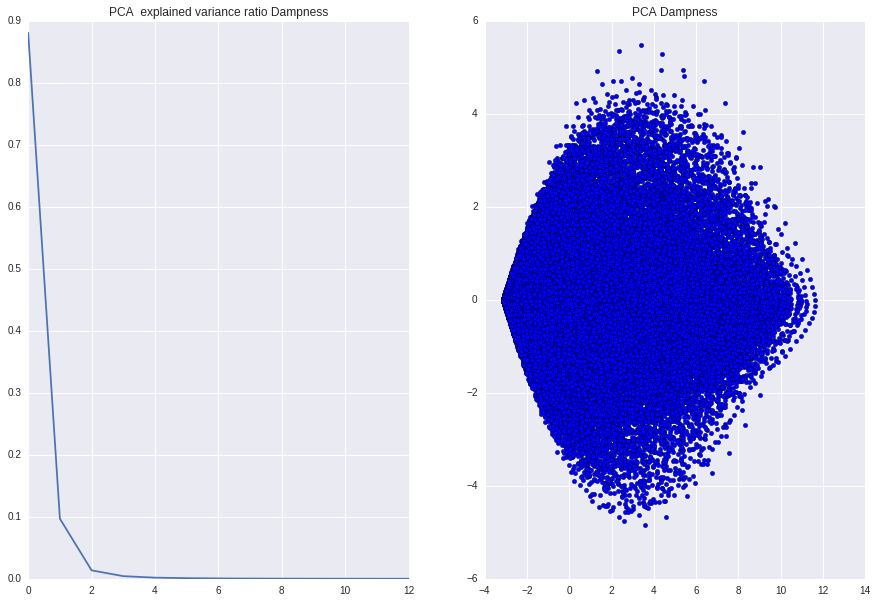

('Analysis for', 'Air temperature')
(63070, 13)


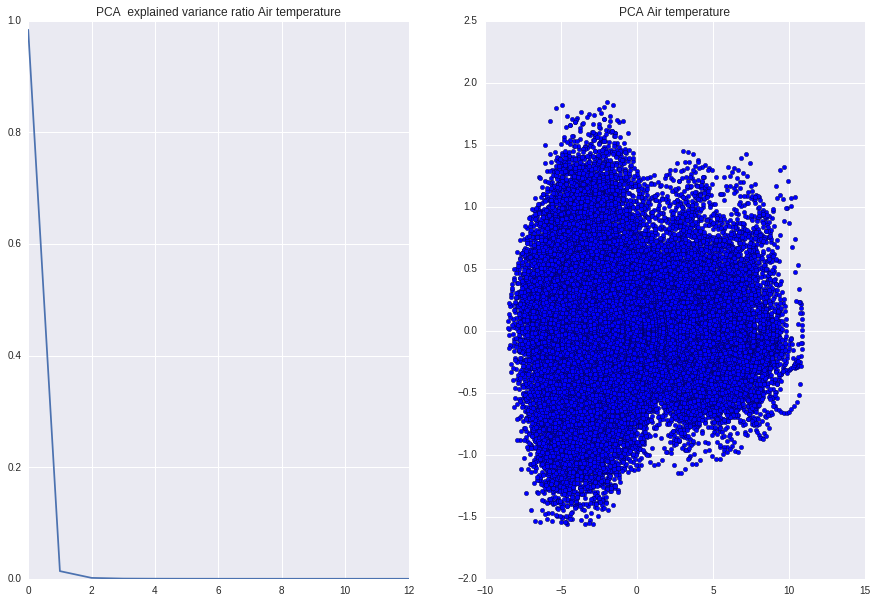

('Analysis for', 'Road temperature')
(63070, 13)


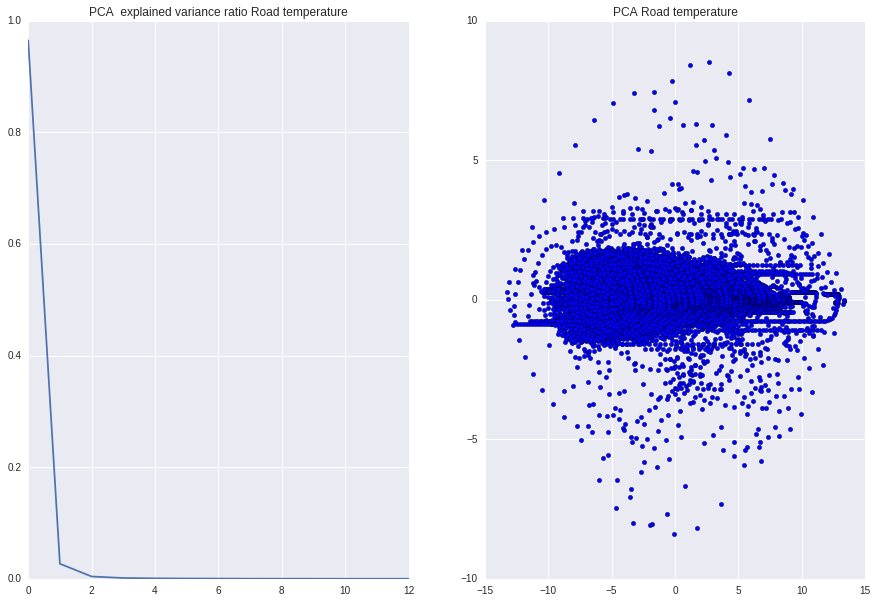

('Analysis for', 'Underroad temperature')
(63070, 13)


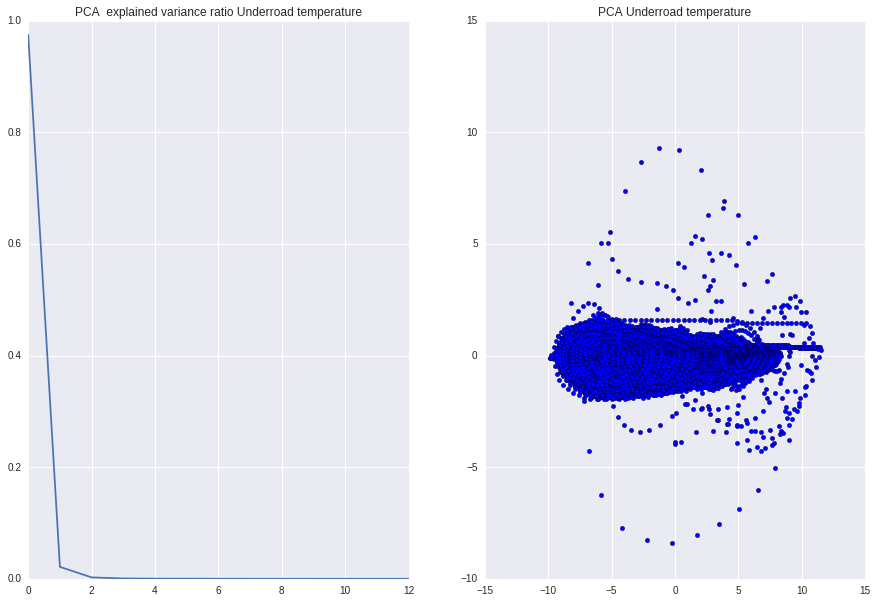

('Analysis for', 'Pressure')
(63070, 13)


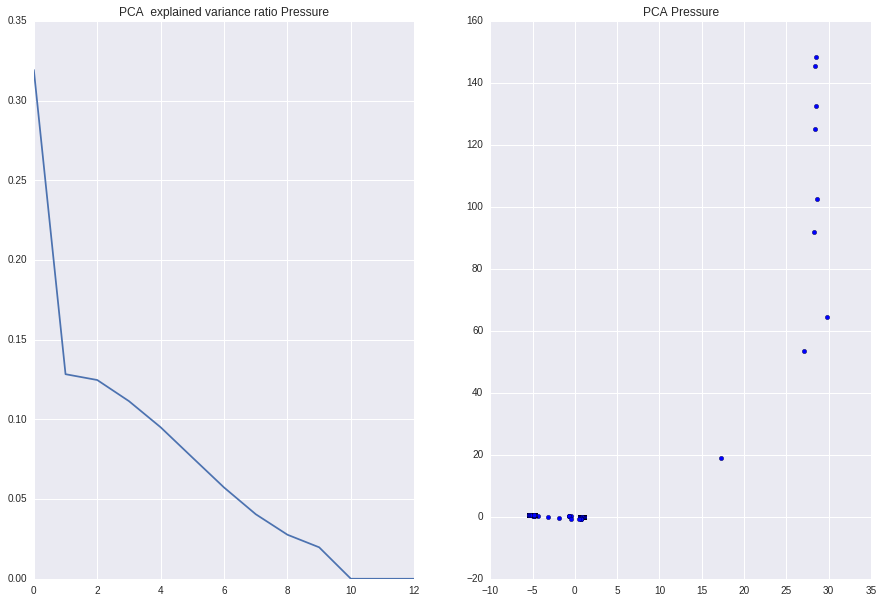

In [16]:
params_analysis('data_dampness', "Dampness")
params_analysis('data_t_air', "Air temperature")
params_analysis('data_t_road', "Road temperature")
params_analysis('data_t_underroad', "Underroad temperature")
params_analysis('data_pressure', "Pressure")

In [18]:
df = stat_13['data_pressure']

scaler = StandardScaler().fit(df)
X_scaled_pr = scaler.transform(df)
pca_all = PCA()
pca_all.fit(X_scaled_pr)
pca = PCA(n_components= 2)
X_pca_pr = pca.fit_transform(X_scaled_pr)


itemindex = np.where(X_pca_pr[:,0] > 15)
itemindex

(array([49, 50, 51, 52, 53, 54, 55, 56, 57]),)

In [19]:
df.iloc[49]

-6.0       7463.631409
-5.5       7463.000000
-5.0       7464.976504
-4.5       7467.539694
-4.0       7470.102884
-3.5       7471.000000
-3.0       7464.902256
-2.5       7463.000000
-2.0       7463.000000
-1.5       7469.851385
-1.0       7467.578630
-0.5       7463.798110
0.0     5600192.572559
Name: 49, dtype: float64

In [20]:
df = final['data_pressure']
df.iloc[49:58]

,-6.0,-5.5,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0.0
49,7463.631409,7463.000000,7464.976504,7467.539694,7470.102884,7471.000000,7464.902256,7463.000000,7463.000000,7469.851385,7467.578630,7463.798110,5600192.572559
50,7463.000000,7464.976504,7467.539694,7470.102884,7471.000000,7464.902256,7463.000000,7463.000000,7469.851385,7467.578630,7463.798110,5600192.572559,2663422.690812
51,7464.976504,7467.539694,7470.102884,7471.000000,7464.902256,7463.000000,7463.000000,7469.851385,7467.578630,7463.798110,5600192.572559,2663422.690812,7463.000000
52,7467.539694,7470.102884,7471.000000,7464.902256,7463.000000,7463.000000,7469.851385,7467.578630,7463.798110,5600192.572559,2663422.690812,7463.000000,7463.000000
53,7470.102884,7471.000000,7464.902256,7463.000000,7463.000000,7469.851385,7467.578630,7463.798110,5600192.572559,2663422.690812,7463.000000,7463.000000,7463.000000
54,7471.000000,7464.902256,7463.000000,7463.000000,7469.851385,7467.578630,7463.798110,5600192.572559,2663422.690812,7463.000000,7463.000000,7463.000000,7466.416309
55,7464.902256,7463.000000,7463.000000,7469.851385,7467.578630,7463.798110,5600192.572559,2663422.690812,7463.000000,7463.000000,7463.000000,7466.416309,7470.278970
56,7463.000000,7463.000000,7469.851385,7467.578630,7463.798110,5600192.572559,2663422.690812,7463.000000,7463.000000,7463.000000,7466.416309,7470.278970,7471.000000
57,7463.000000,7469.851385,7467.578630,7463.798110,5600192.572559,2663422.690812,7463.000000,7463.000000,7463.000000,7466.416309,7470.278970,7471.000000,7471.000000


(63070, 13)
(63053, 13)


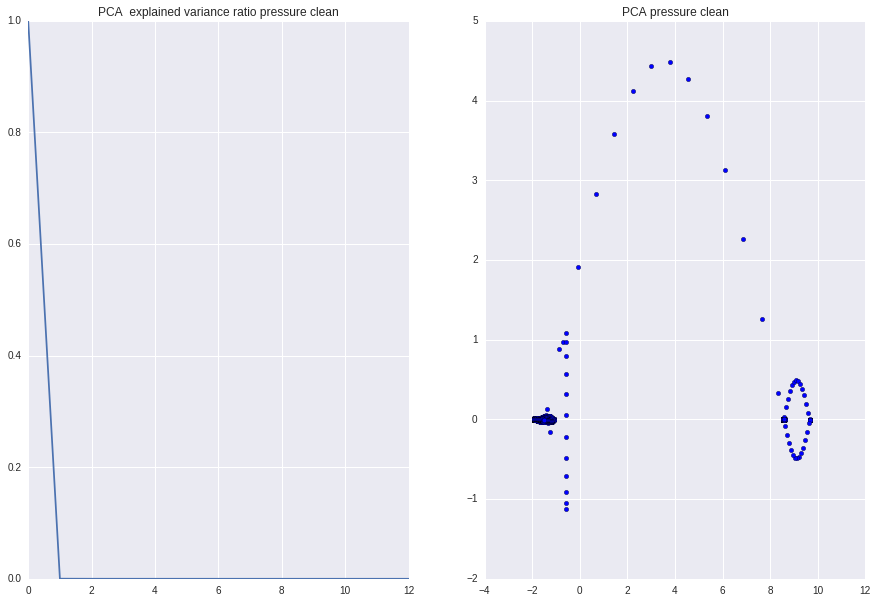

In [21]:

df = stat_13['data_pressure']

print(df.shape)

pressure_clean = df.drop(df.index[range(42,59)])
print(pressure_clean.shape)

scaler = StandardScaler().fit(pressure_clean)
X_scaled_pr = scaler.transform(pressure_clean)
pca_all = PCA()
pca_all.fit(X_scaled_pr)
pca = PCA(n_components= 2)
X_pca_pr = pca.fit_transform(X_scaled_pr)

title = "pressure clean"

f, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(15,10))
        
ax1.plot(pca_all.explained_variance_ratio_)
ax1.set_title("PCA  explained variance ratio " + title) 


ax2.scatter(X_pca_pr[:, 0], X_pca_pr[:, 1])
# ax2.set_xlim(right = 5)
ax2.set_title("PCA " + title)


plt.show()

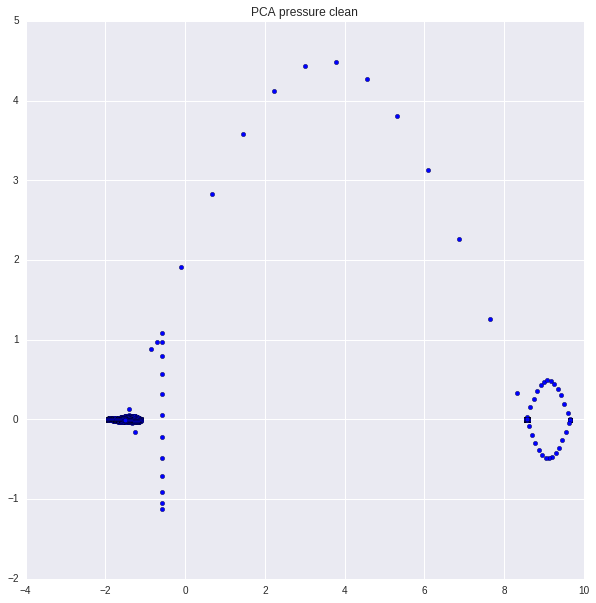

In [22]:

plt.figure(figsize=(10,10))
plt.scatter(X_pca_pr[:, 0], X_pca_pr[:, 1])
plt.xlim(right = 10)
plt.title("PCA " + title)


plt.show()

In [32]:
itemindex = np.where(X_pca_pr[:,0] < 0)
len(itemindex[0])

53582

In [11]:
pressure_clean.iloc[range(321964, 321976)]

,-6.0,-5.5,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0.0
321981,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7522.302198,7530.000000,7530.000000,7530.000000,20946.069803,51360.333839
321982,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7522.302198,7530.000000,7530.000000,7530.000000,20946.069803,51360.333839,39159.803853
321983,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7522.302198,7530.000000,7530.000000,7530.000000,20946.069803,51360.333839,39159.803853,740.000000
321984,7520.000000,7520.000000,7520.000000,7520.000000,7522.302198,7530.000000,7530.000000,7530.000000,20946.069803,51360.333839,39159.803853,740.000000,740.000000
321985,7520.000000,7520.000000,7520.000000,7522.302198,7530.000000,7530.000000,7530.000000,20946.069803,51360.333839,39159.803853,740.000000,740.000000,740.000000
321986,7520.000000,7520.000000,7522.302198,7530.000000,7530.000000,7530.000000,20946.069803,51360.333839,39159.803853,740.000000,740.000000,740.000000,740.000000
321987,7520.000000,7522.302198,7530.000000,7530.000000,7530.000000,20946.069803,51360.333839,39159.803853,740.000000,740.000000,740.000000,740.000000,740.000000
321988,7522.302198,7530.000000,7530.000000,7530.000000,20946.069803,51360.333839,39159.803853,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
321989,7530.000000,7530.000000,7530.000000,20946.069803,51360.333839,39159.803853,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
321990,7530.000000,7530.000000,20946.069803,51360.333839,39159.803853,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000


In [33]:
from sklearn import svm

df = stat_13['data_t_road']

print(df.shape)
scaler = StandardScaler().fit(df)
X_scaled_pr = scaler.transform(df)
n_samples = len(X_scaled_pr)

pca_all = PCA()
pca_all.fit(X_scaled_pr)
pca = PCA(n_components= 2)
X_pca_pr = pca.fit_transform(X_scaled_pr)



xx, yy = np.meshgrid(np.linspace(X_pca_pr[:,0].min(), X_pca_pr[:,0].max(), 500), 
                    np.linspace(X_pca_pr[:,0].min(), X_pca_pr[:,0].max(), 500))

(63070, 13)


In [ ]:
from sklearn.ensemble import IsolationForest
from scipy import stats

fraction of outliers 12614 / 63070
threshold 0.131480
max of Z 0.130926


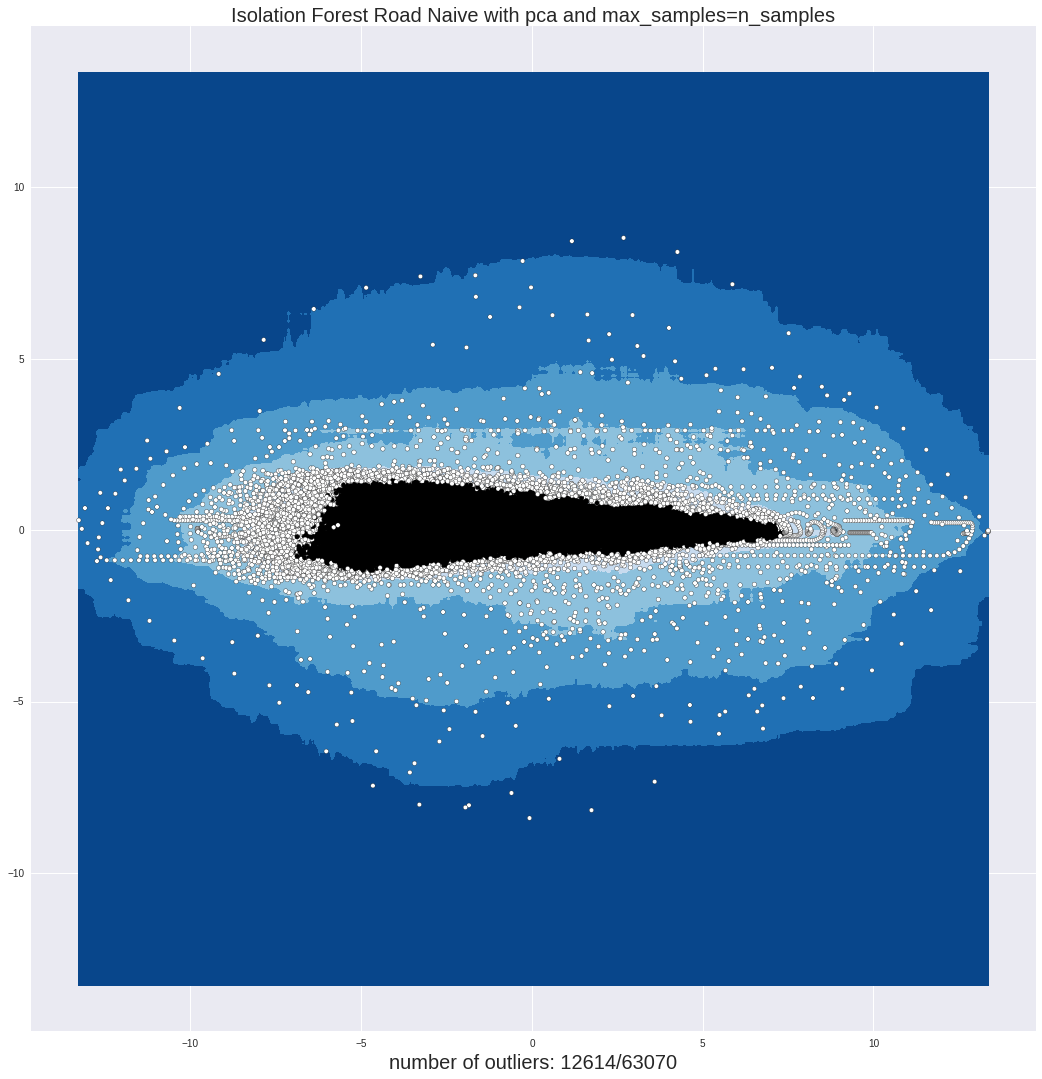

In [52]:
clf_if = IsolationForest(max_samples=n_samples, bootstrap = True, n_jobs = -1)
clf_if.fit(X_pca_pr)
y_pred_if = clf_if.predict(X_pca_pr)
Z = clf_if.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

print("fraction of outliers %d / %d" % (n_samples -y_pred_if.sum(), len(y_pred_if)))
scores_pred = clf_if.decision_function(X_pca_pr)
threshold = stats.scoreatpercentile(scores_pred, 100 * len(y_pred_if)/ n_samples)
print("threshold %f" % threshold)
print("max of Z %f" % Z.max())

plt.figure(figsize=(18, 18))
# plt.rcParams.update({'font.size': 122})
plt.title("Isolation Forest Road Naive with pca and max_samples=n_samples", fontsize =20)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                 cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, levels=[threshold],
                    linewidths=2, colors='red')
# plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], cmap=plt.cm.Oranges)
plt.scatter(X_pca_pr[:, 0], X_pca_pr[:, 1], c=y_pred_if)
plt.xlabel(
    "number of outliers: %d/%d"
    % (n_samples - y_pred_if.sum() , n_samples), fontsize =20)
plt.show()

fraction of outliers 12614 / 63070
threshold 0.140243
max of Z 0.140139


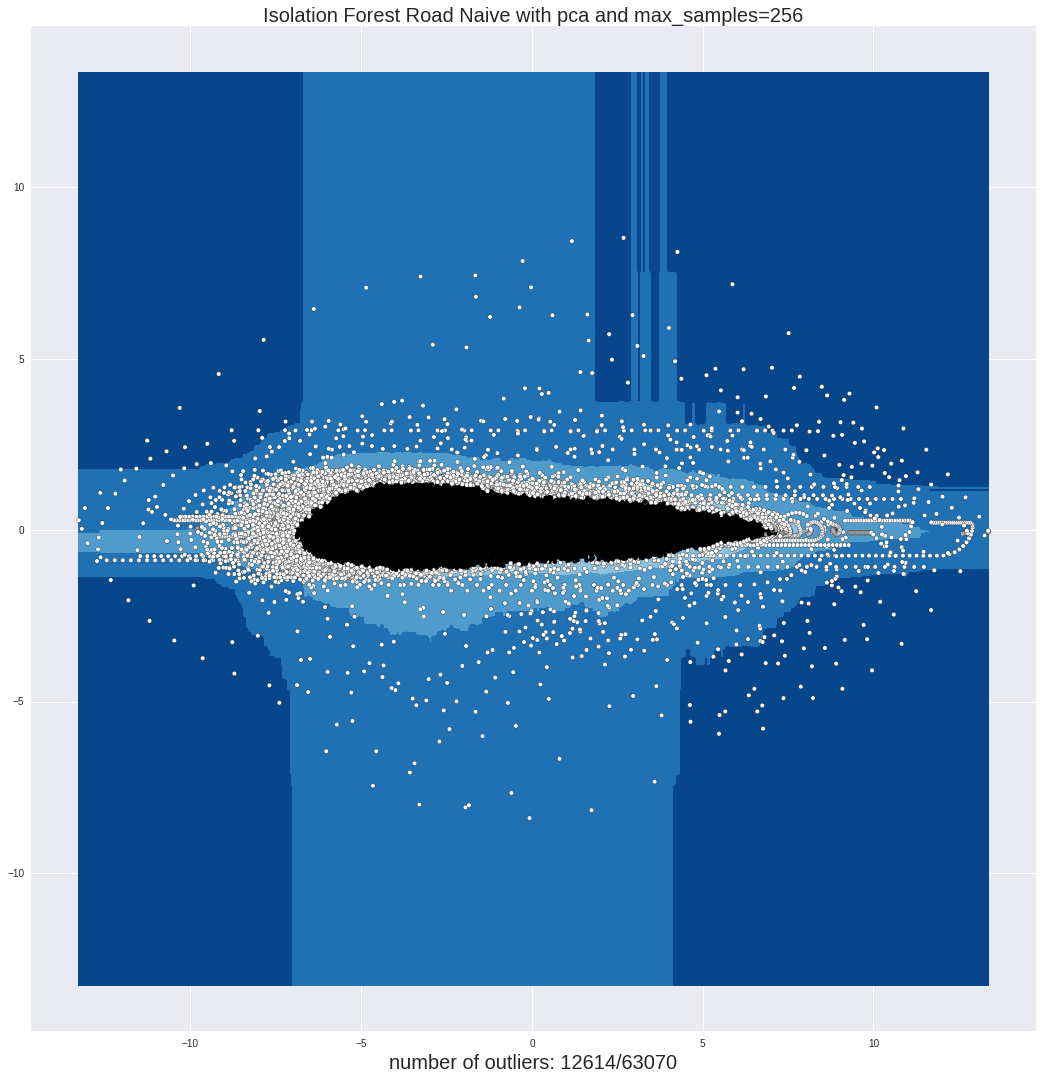

In [53]:
clf_if = IsolationForest(max_samples=256, bootstrap = True, n_jobs = -1)
clf_if.fit(X_pca_pr)
y_pred_if = clf_if.predict(X_pca_pr)
Z = clf_if.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

print("fraction of outliers %d / %d" % (n_samples -y_pred_if.sum(), len(y_pred_if)))
scores_pred = clf_if.decision_function(X_pca_pr)
threshold = stats.scoreatpercentile(scores_pred, 100 * len(y_pred_if)/ n_samples)
print("threshold %f" % threshold)
print("max of Z %f" % Z.max())

plt.figure(figsize=(18, 18))
# plt.rcParams.update({'font.size': 122})
plt.title("Isolation Forest Road Naive with pca and max_samples=256", fontsize =20)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                 cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, levels=[threshold],
                    linewidths=2, colors='red')
# plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], cmap=plt.cm.Oranges)
plt.scatter(X_pca_pr[:, 0], X_pca_pr[:, 1], c=y_pred_if)
plt.xlabel(
    "number of outliers: %d/%d"
    % (n_samples - y_pred_if.sum() , n_samples), fontsize =20)
plt.show()

In [60]:
X_scaled_pr.shape

(63070, 13)

50456

In [79]:


X_scaled_pr[mask_ind].shape

(12614, 13)

fraction of outliers 9946 / 50456


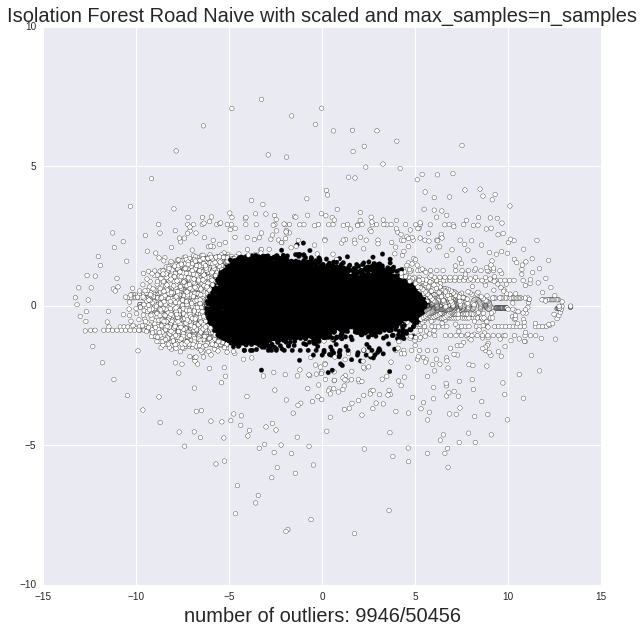

In [88]:
train = random.sample(range(n_samples),  int(0.2 * n_samples)) 
test = list(set(range(n_samples)) - set(train))


clf_if = IsolationForest(max_samples=256, bootstrap = True, n_jobs = -1,  n_estimators= 1000)

data_current = X_scaled_pr
clf_if.fit(data_current[train])
y_pred_if = clf_if.predict(data_current[test])

# xx, yy = np.meshgrid(np.linspace(X_pca_pr[:,0].min(), X_pca_pr[:,0].max(), 500), 
#                     np.linspace(X_pca_pr[:,1].min(), X_pca_pr[:,1].max(), 500))


# Z = clf_if.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

print("fraction of outliers %d / %d" % (len(y_pred_if) -y_pred_if.sum(), len(y_pred_if)))
# scores_pred = clf_if.decision_function(data_current)
# threshold = stats.scoreatpercentile(scores_pred, 100 * len(y_pred_if)/ n_samples)
# print("threshold %f" % threshold)
# print("max of Z %f" % Z.max())

plt.figure(figsize=(10, 10))
# plt.rcParams.update({'font.size': 122})
plt.title("Isolation Forest Road Naive with scaled and max_samples=n_samples", fontsize =20)
# plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
#                  cmap=plt.cm.Blues_r)
# plt.contour(xx, yy, Z, levels=[threshold],
#                     linewidths=2, colors='red')
# plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], cmap=plt.cm.Oranges)
plt.scatter(X_pca_pr[test, 0], X_pca_pr[test, 1], c=y_pred_if)
plt.xlabel(
    "number of outliers: %d/%d"
    % (len(y_pred_if) - y_pred_if.sum() , len(y_pred_if)), fontsize =20)
plt.show()

plt.plot_date()

In [63]:
clf_if.get_params

<bound method IsolationForest.get_params of IsolationForest(bootstrap=True, contamination=0.1, max_features=13,
        max_samples=256, n_estimators=1000, n_jobs=-1, random_state=None,
        verbose=0)>

Попробуем только с температурой дороги и датой разбраться

In [171]:
time = pd.to_datetime(stat_13[ ('date_time', '0.0')])
arraysc = [np.array(['time'])]
tt = pd.DataFrame(list(time), columns= arraysc)

time_num = pd.DataFrame(list(pd.to_numeric(time)), columns= [np.array(['time_num'])]) 

t_road = stat_13['data_t_road']

road_date = pd.concat([stat_13['data_t_road'], time_num, tt], axis = 1)
road_date

,-6.0,-5.5,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0.0,time_num,time
0,60.480769,56.782723,55.135120,54.097954,53.544183,53.040828,52.104978,47.396962,42.237891,40.159700,36.320891,36.000000,36.000000,1348034400000000000,2012-09-19 06:00:00
1,56.782723,55.135120,54.097954,53.544183,53.040828,52.104978,47.396962,42.237891,40.159700,36.320891,36.000000,36.000000,36.000000,1348036200000000000,2012-09-19 06:30:00
2,55.135120,54.097954,53.544183,53.040828,52.104978,47.396962,42.237891,40.159700,36.320891,36.000000,36.000000,36.000000,45.406880,1348038000000000000,2012-09-19 07:00:00
3,54.097954,53.544183,53.040828,52.104978,47.396962,42.237891,40.159700,36.320891,36.000000,36.000000,36.000000,45.406880,62.840947,1348039800000000000,2012-09-19 07:30:00
4,53.544183,53.040828,52.104978,47.396962,42.237891,40.159700,36.320891,36.000000,36.000000,36.000000,45.406880,62.840947,84.282662,1348041600000000000,2012-09-19 08:00:00
5,53.040828,52.104978,47.396962,42.237891,40.159700,36.320891,36.000000,36.000000,36.000000,45.406880,62.840947,84.282662,105.975349,1348043400000000000,2012-09-19 08:30:00
6,52.104978,47.396962,42.237891,40.159700,36.320891,36.000000,36.000000,36.000000,45.406880,62.840947,84.282662,105.975349,125.497426,1348045200000000000,2012-09-19 09:00:00
7,47.396962,42.237891,40.159700,36.320891,36.000000,36.000000,36.000000,45.406880,62.840947,84.282662,105.975349,125.497426,142.343472,1348047000000000000,2012-09-19 09:30:00
8,42.237891,40.159700,36.320891,36.000000,36.000000,36.000000,45.406880,62.840947,84.282662,105.975349,125.497426,142.343472,156.252613,1348048800000000000,2012-09-19 10:00:00
9,40.159700,36.320891,36.000000,36.000000,36.000000,45.406880,62.840947,84.282662,105.975349,125.497426,142.343472,156.252613,170.109827,1348050600000000000,2012-09-19 10:30:00


In [180]:
road_t_num = road_date.iloc[:,0:-1]

road_date.iloc[:,-3]

0         36.000000
1         36.000000
2         45.406880
3         62.840947
4         84.282662
5        105.975349
6        125.497426
7        142.343472
8        156.252613
9        170.109827
10       183.982659
11       189.652287
12       194.672741
13       199.693194
14       196.726619
15       193.240177
16       206.400853
17       205.266515
18       212.849337
19       217.468298
20       185.225555
21       209.118943
22       201.919913
23       179.123576
24       154.965561
25       140.586448
26       130.169279
27       121.492979
28       115.344972
29       110.557008
            ...    
63040    206.962534
63041    202.993388
63042    197.042975
63043    194.056013
63044    190.107989
63045    186.802800
63046    184.438017
63047    187.413223
63048    192.331863
63049    207.513216
63050    206.258953
63051    226.708333
63052    252.105902
63053    275.109763
63054    299.852260
63055    323.665198
63056    346.846619
63057    361.002755
63058    379.330396


('Analysis for', 'pressure clean')
(63070, 14)


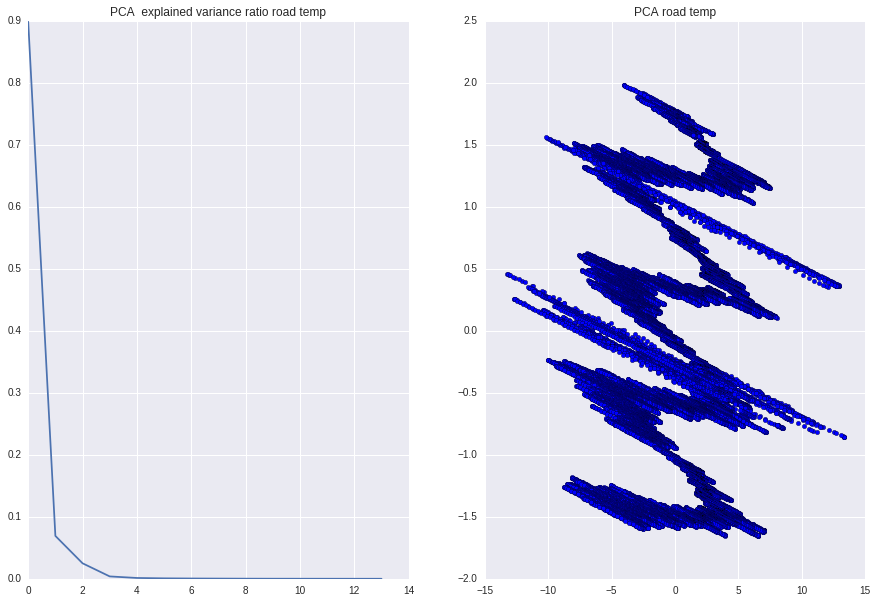

In [176]:
plt.close('all')
print( "Analysis for", title)
df = road_t_num

title = "road temp"
print(df.shape)
scaler = StandardScaler().fit(df)
X_scaled_pr = scaler.transform(df)

pca_all = PCA()
pca_all.fit(X_scaled_pr)
pca = PCA(n_components= 2)
X_pca_pr = pca.fit_transform(X_scaled_pr)

f, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(15,10))

ax1.plot(pca_all.explained_variance_ratio_)
ax1.set_title("PCA  explained variance ratio " + title) 


ax2.scatter(X_pca_pr[:, 0], X_pca_pr[:, 1])
ax2.set_title("PCA " + title)


plt.show()

number of samples 63070
fraction of outliers 12614 / 63070
threshold 0.078337
max of Z 0.077483


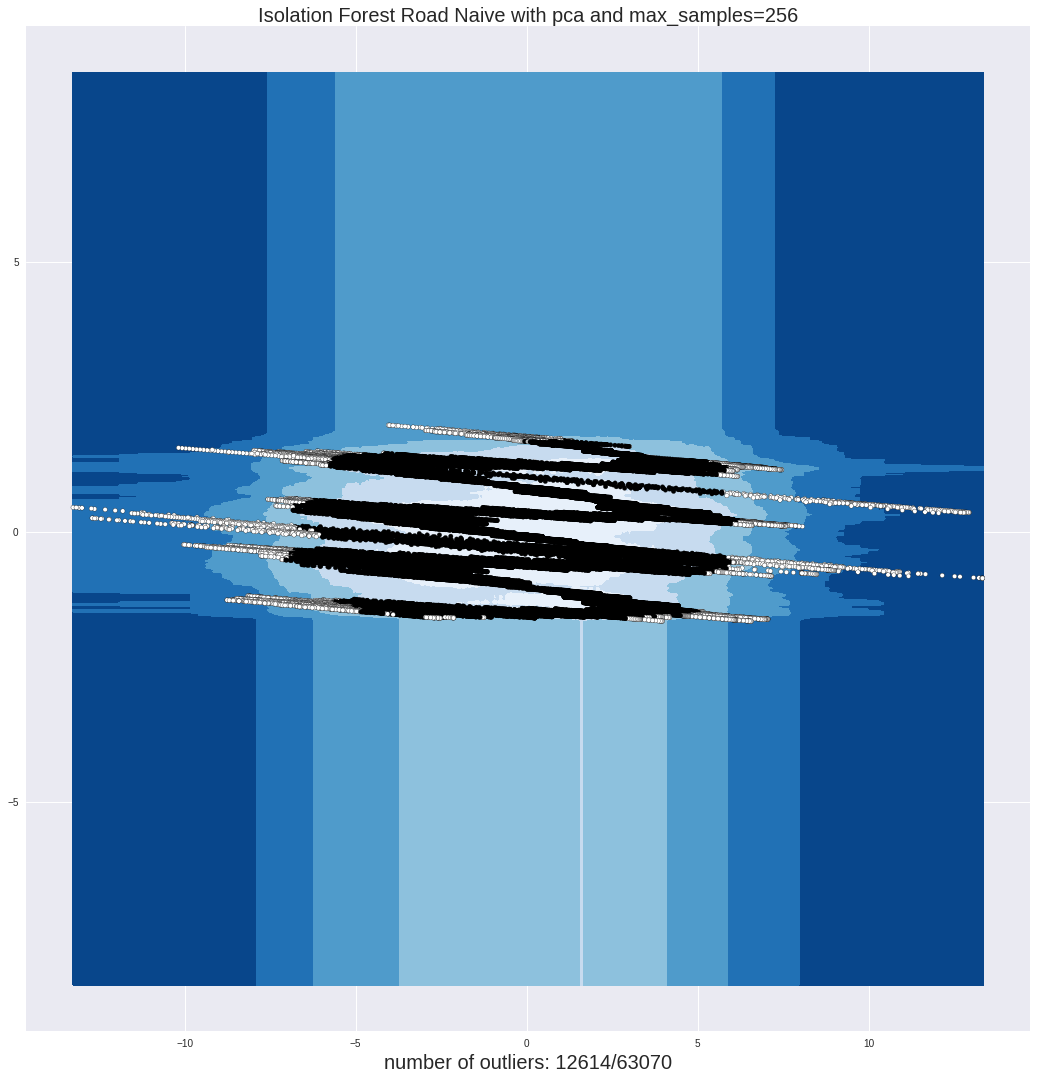

In [177]:
n_samples = X_pca_pr.shape[0]

print("number of samples %d" % n_samples)

clf_if = IsolationForest(max_samples=256, bootstrap = True, n_jobs = -1)
clf_if.fit(X_pca_pr)
y_pred_if = clf_if.predict(X_pca_pr)
Z = clf_if.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

print("fraction of outliers %d / %d" % (len(y_pred_if) -y_pred_if.sum(), len(y_pred_if)))
scores_pred = clf_if.decision_function(X_pca_pr)
threshold = stats.scoreatpercentile(scores_pred, 100 * len(y_pred_if)/ n_samples)
print("threshold %f" % threshold)
print("max of Z %f" % Z.max())

plt.figure(figsize=(10, 10))
# plt.rcParams.update({'font.size': 122})
plt.title("Isolation Forest Road Naive with pca and max_samples=256", fontsize =20)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                 cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, levels=[threshold],
                    linewidths=2, colors='red')
# plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], cmap=plt.cm.Oranges)
plt.scatter(X_pca_pr[:, 0], X_pca_pr[:, 1], c=y_pred_if)
plt.xlabel(
    "number of outliers: %d/%d"
    % (n_samples - y_pred_if.sum() , n_samples), fontsize =20)
plt.show()




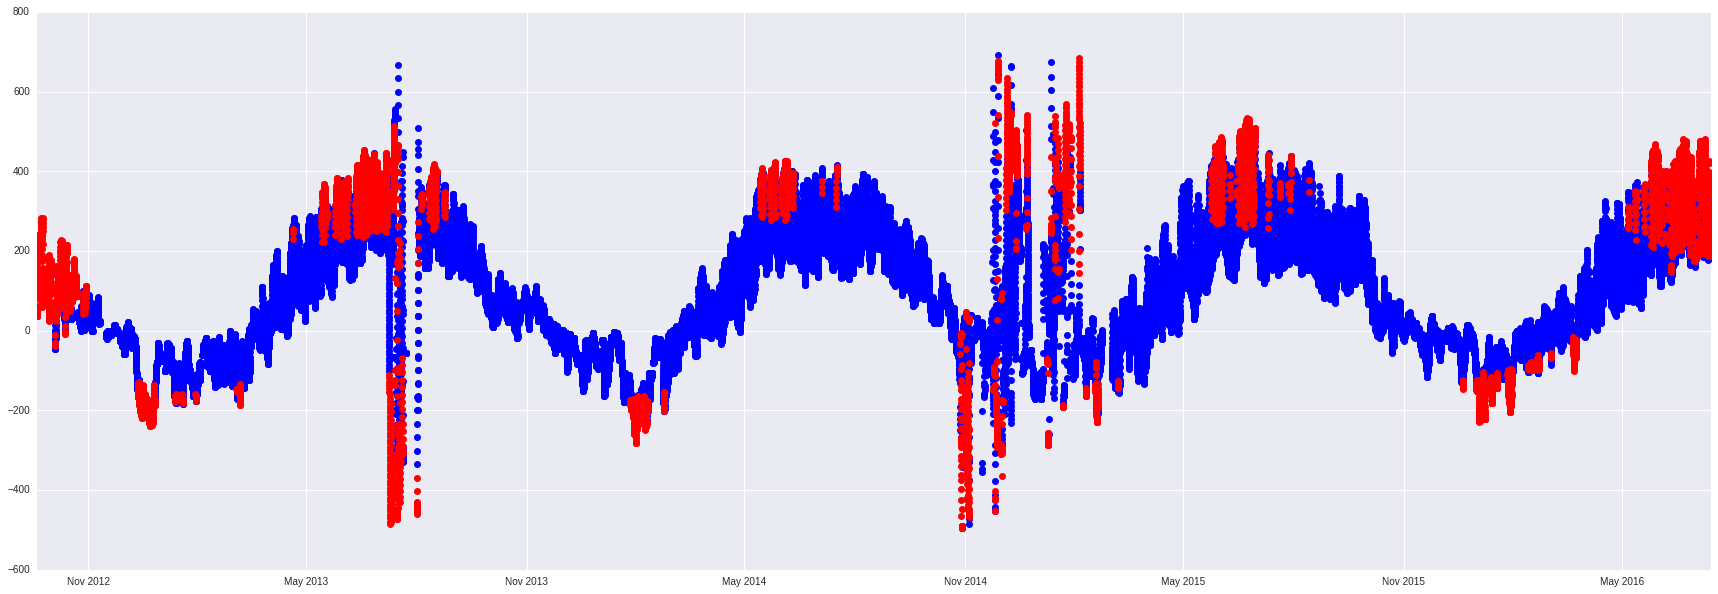

In [216]:
plt.close('all')

yes = np.where(y_pred_if > 0)[0]
no = np.where(y_pred_if < 0)[0]
plt.figure(figsize=(30, 10))
plt.plot_date(time[yes], list(road_date.iloc[yes,-3]), c = "blue")
plt.plot_date(time[no], list(road_date.iloc[no,-3]), c = "red")
plt.show()

number of samples 63070
fraction of outliers 12614 / 63070


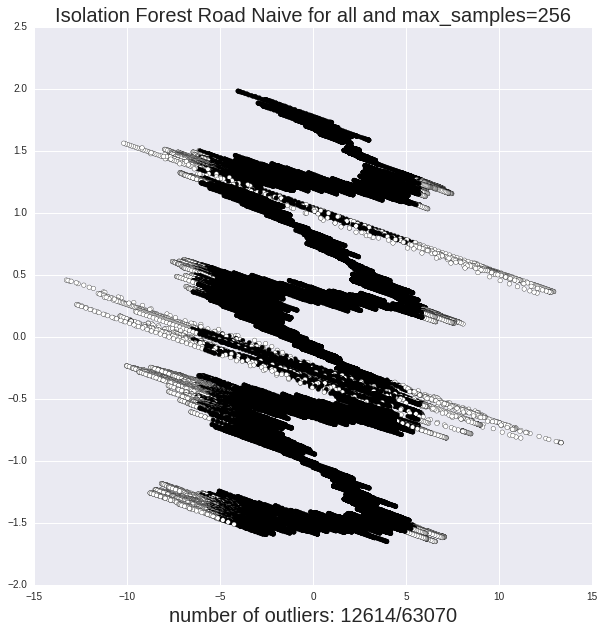

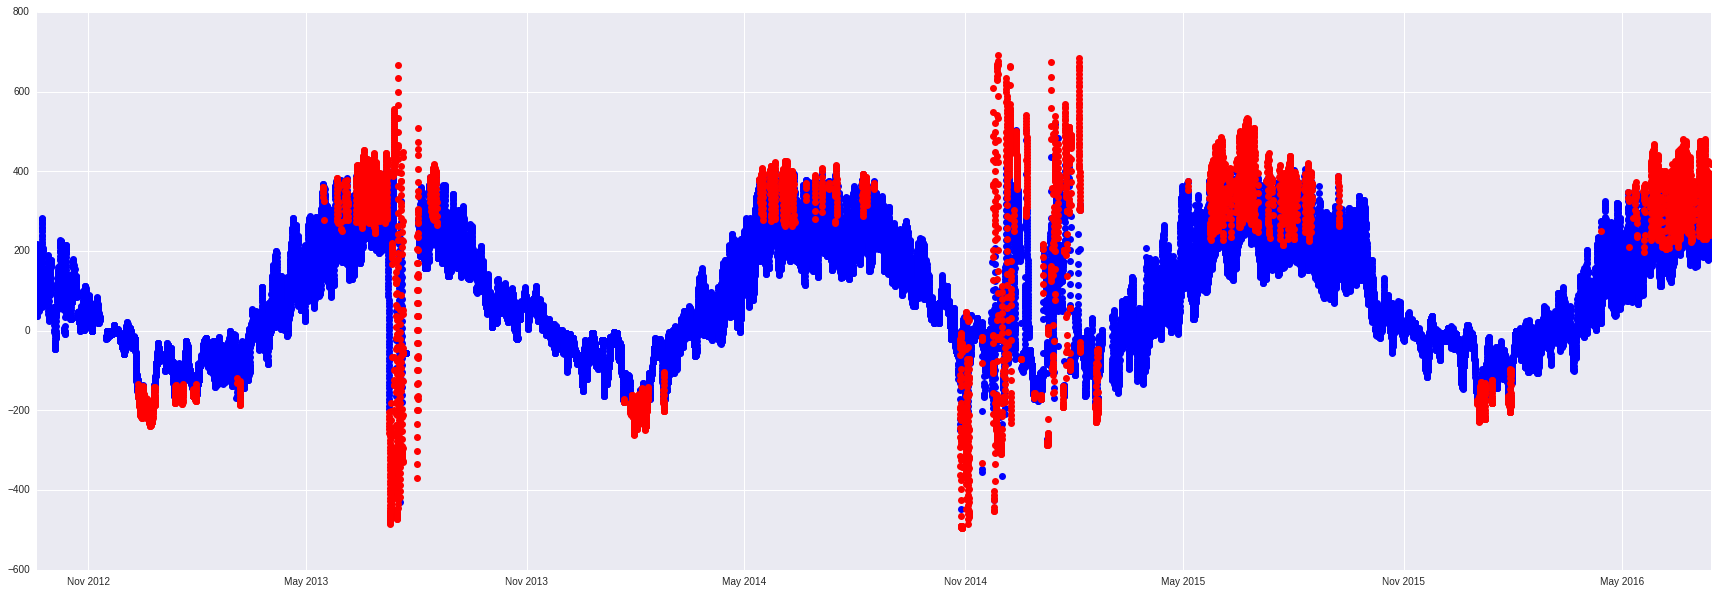

In [243]:
print("number of samples %d" % n_samples)

clf_if = IsolationForest(max_samples=256, bootstrap = True, n_jobs = -1, max_features= 14)
clf_if.fit(road_t_num)
y_pred_if = clf_if.predict(road_t_num)
# Z = clf_if.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

print("fraction of outliers %d / %d" % (len(y_pred_if) -y_pred_if.sum(), len(y_pred_if)))
# scores_pred = clf_if.decision_function(X_pca_pr)
# threshold = stats.scoreatpercentile(scores_pred, 100 * len(y_pred_if)/ n_samples)
# print("threshold %f" % threshold)
# print("max of Z %f" % Z.max())

plt.figure(figsize=(10, 10))
# plt.rcParams.update({'font.size': 122})
plt.title("Isolation Forest Road Naive for all and max_samples=256", fontsize =20)
# plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
#                  cmap=plt.cm.Blues_r)
# plt.contour(xx, yy, Z, levels=[threshold],
#                     linewidths=2, colors='red')
# plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], cmap=plt.cm.Oranges)
plt.scatter(X_pca_pr[:, 0], X_pca_pr[:, 1], c=y_pred_if)
plt.xlabel(
    "number of outliers: %d/%d"
    % (n_samples - y_pred_if.sum() , n_samples), fontsize =20)
plt.show()

plt.close('all')

yes = np.where(y_pred_if > 0)[0]
no = np.where(y_pred_if < 0)[0]
plt.figure(figsize=(30, 10))
plt.plot_date(time[yes], list(road_date.iloc[yes,-3]), c = "blue")
plt.plot_date(time[no], list(road_date.iloc[no,-3]), c = "red")
plt.show()

In [232]:

np.array(test).max()

road_t_num.iloc[train, :]

,-6.0,-5.5,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0.0,time_num
47057,216.952568,227.284894,243.883811,252.591781,264.587267,264.106195,262.000000,264.024510,268.308581,277.169967,294.465385,313.387755,317.500826,1438428600000000000
57560,-27.328947,-29.000000,-29.412672,-30.404408,-31.396143,-32.000000,-32.379063,-33.000000,-33.362335,-34.000000,-34.690909,-36.674380,-36.685022,1457762400000000000
56948,-15.000000,-14.822039,-13.830303,-12.838656,-11.545156,-8.862562,-7.872867,-6.882223,-6.108064,-6.946363,-6.391492,-5.124449,-3.000000,1456660800000000000
12856,-402.175654,-410.748599,-419.321543,-427.894488,-436.467432,-445.040377,-453.613321,-462.186265,-470.759210,-479.332154,-485.429254,-482.860899,-480.292543,1373439600000000000
6433,-42.013889,-46.773896,-51.119630,-53.937913,-55.159286,-56.000000,-55.460674,-55.000000,-55.000000,-55.000000,-55.000000,-55.000000,-55.000000,1361835000000000000
35795,-68.252219,-71.072063,-73.891906,-76.711749,-79.531593,-82.351436,-85.171279,-87.991123,-90.810966,-93.630809,-96.450653,-99.270496,-102.090339,1416871800000000000
10556,126.410714,121.875000,117.407138,115.912037,114.721561,114.468605,117.634921,123.246032,131.195106,137.376074,148.289683,161.878307,172.197621,1369299600000000000
1941,-13.000000,-13.000000,-13.008547,-14.000000,-13.620237,-13.000000,-13.000000,-13.000000,-12.678243,-12.332886,-12.000000,-12.000000,-12.000000,1353191400000000000
21929,-232.030905,-227.350442,-220.053256,-211.609547,-203.705298,-197.745033,-190.569536,-179.628209,-172.672647,-166.267108,-162.470199,-160.170040,-161.163784,1391353200000000000
43060,133.758945,124.479339,114.722772,114.248899,114.367347,110.398678,106.032651,100.684211,95.122584,89.788430,84.917816,81.946878,79.322314,1431122400000000000


In [245]:
type(y_pred_if)

numpy.ndarray

In [260]:
import copy
n_samples = road_t_num.shape[0]
train = random.sample(range(n_samples),  int(0.2 * n_samples)) 
test = list(set(range(n_samples)) - set(train))

print("number of samples %d" % n_samples)

clf_if = IsolationForest(max_samples=256, bootstrap = True, n_jobs = -1, max_features= 14)

df_test = copy.deepcopy(road_t_num.iloc[test, :])
df_train =  copy.deepcopy(road_t_num.iloc[train, :])
df_train

number of samples 63070


,-6.0,-5.5,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0.0,time_num
29878,220.652318,231.504123,245.281060,224.320817,230.487859,235.649365,236.375483,223.161148,203.682994,195.025938,195.961369,193.860375,182.951408,1405967400000000000
22602,-47.246137,-48.479293,-50.233444,-51.226821,-51.779801,-50.786894,-49.795141,-49.000000,-49.096026,-49.592715,-50.000000,-50.000000,-50.000000,1392611400000000000
12535,269.201875,282.070640,295.977925,307.343078,322.915609,338.684327,346.452040,349.817881,355.768386,366.483376,376.453392,368.363636,361.192053,1372861800000000000
11614,210.098738,205.115894,202.089404,202.963576,207.784768,215.606847,223.554084,232.434087,237.652318,248.167863,256.338114,267.927152,286.166023,1371204000000000000
61103,296.424242,308.949339,323.561983,335.744493,346.757576,355.030303,358.611570,365.898072,362.730028,365.382920,359.567110,351.868637,332.164204,1464706800000000000
33530,31.435430,32.000000,32.844371,34.831126,36.818332,38.805295,40.395695,41.388430,42.000000,43.122517,45.735505,47.413771,48.480971,1412688600000000000
11839,344.399890,333.523077,323.456954,314.375069,307.119691,301.840220,296.066007,290.935608,285.993414,280.817881,276.238411,272.270925,268.975166,1371609000000000000
34718,-368.155629,-370.423841,-356.196911,-353.488693,-356.382662,-357.684879,-360.034768,-362.344009,-355.042573,-343.165816,-331.289058,-319.412301,-307.535544,1414888200000000000
59918,74.246703,78.466116,88.842802,104.391736,122.669967,145.048458,170.250138,191.880926,213.681818,235.767621,257.573789,276.771901,295.128540,1462442400000000000
49794,227.020352,213.524823,203.092004,195.534141,189.365289,183.417401,178.223140,174.011570,170.046256,165.351872,160.393939,156.146637,152.172833,1443565800000000000


In [247]:
clf_if.fit(df_train)
y_pred_if = clf_if.predict(df_test)
# Z = clf_if.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

In [264]:
yes = np.where(y_pred_if > 0)[0]
no = np.where(y_pred_if < 0)[0]

df_train.index[yes]

IndexError: index 12614 is out of bounds for axis 1 with size 12614

number of samples 63070
fraction of outliers 10808 / 50456


ValueError: Color array must be two-dimensional

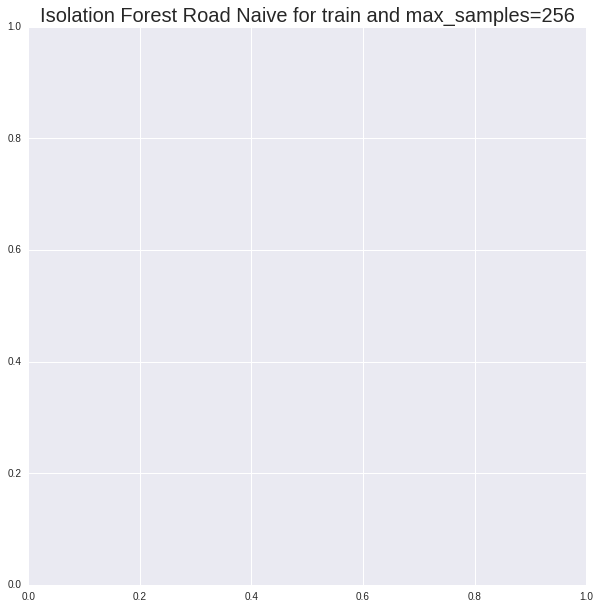

In [236]:
print("fraction of outliers %d / %d" % (len(no), len(y_pred_if)))
# scores_pred = clf_if.decision_function(X_pca_pr)
# threshold = stats.scoreatpercentile(scores_pred, 100 * len(y_pred_if)/ n_samples)
# print("threshold %f" % threshold)
# print("max of Z %f" % Z.max())


plt.close('all')

plt.figure(figsize=(30, 10))
plt.plot_date(time[yes], list(road_date.iloc[yes,-2]), c = "blue")
plt.plot_date(time[no], list(road_date.iloc[no,-2]), c = "red")
plt.xlabel(
    "number of outliers: %d/%d"
    % (n_samples - y_pred_if.sum() , n_samples), fontsize =20)
plt.show()